# ML PROJECT - Red Wine Quality

## Author: David Schmid


Data from Kaggle
https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data?select=winequality-red.csv


### 0. Importing Necessary Libraries


In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Exploratory Data Analysis (EDA)


In [3]:
# 1.1 Check first rows of data
data = pd.read_csv("./data/winequality-red.csv")
data.head()

# Conclusion:
# - Everything is numeric, quality is the target variable

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# 1.2 Basic statistics
data.describe()

# Conclusion:
# - Target variable Quality is between 3 and 8. We will have to check if the distribution is balanced or not. If not, we will have to balance it.
# - We want to solve a classfication problem. If the quality is between 3 and 6, we will classify it as bad. If the quality is between 7 and 8, we will classify it as good.
# - The features have different scales. We will have to scale them.
# - The features have different ranges. We will have to normalize them.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# 1.3 Check for missing values
data.isnull().sum()

# Conclusion:
# - There are no missing values.
# - We will not have to impute missing values.
# - We will not have to drop rows with missing values.
# - We will not have to drop columns with missing values.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

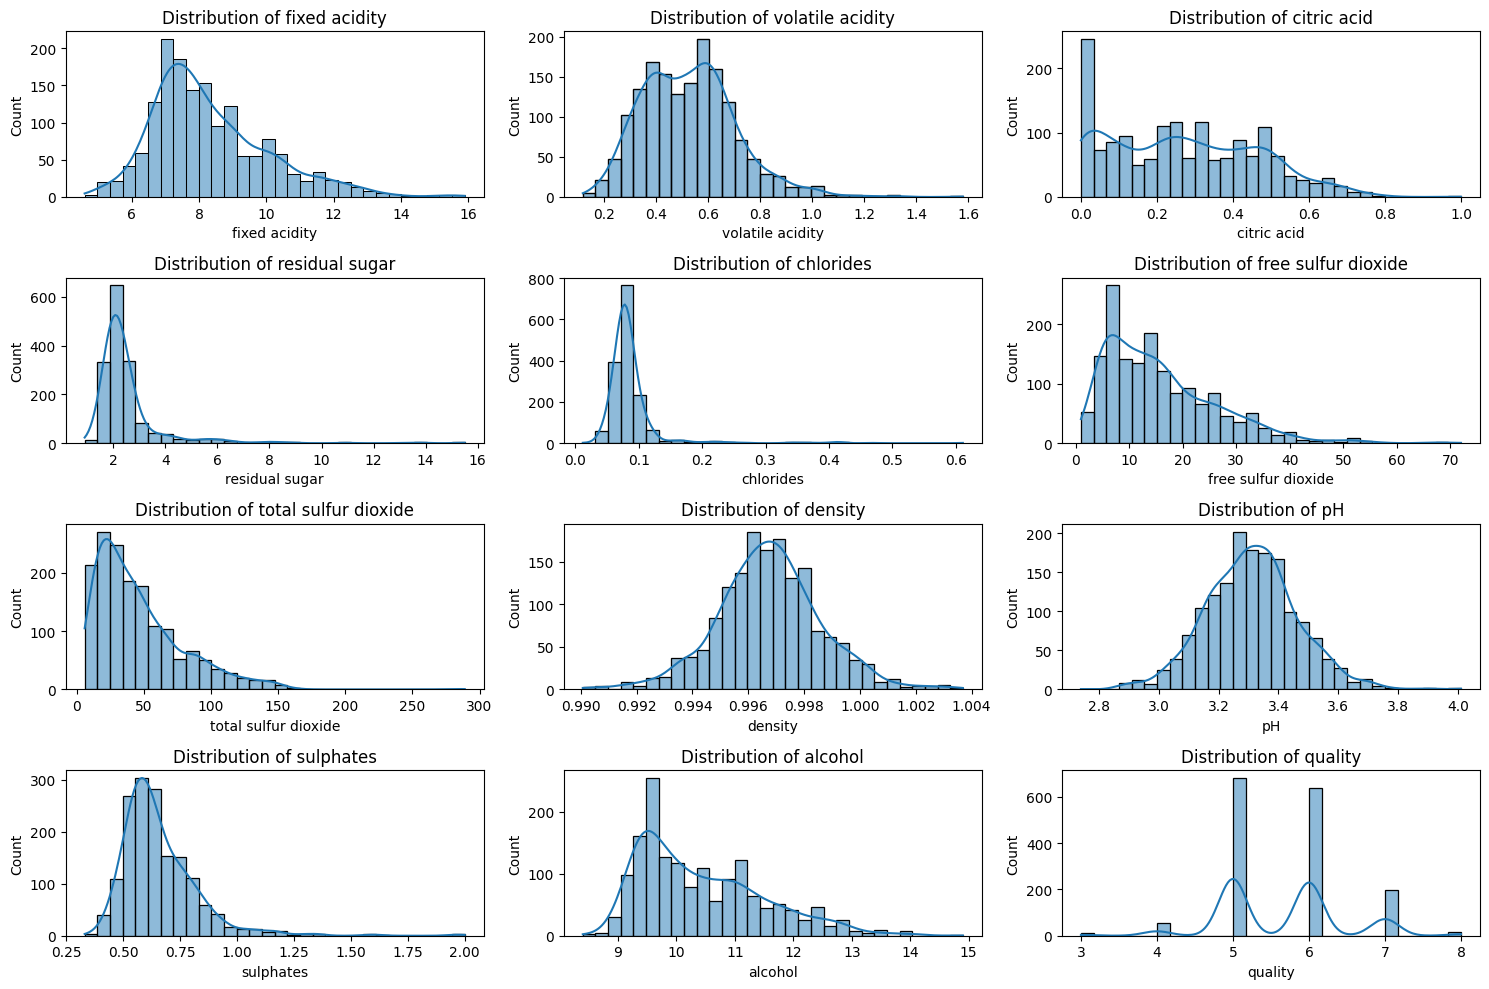

In [6]:
# 1.4 Check for distributions
features = data.columns[:]
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()

# Conclusion:
# - The target variable Quality is normally distributed. We don't have to transform it.
# - Some features are not normally distributed. We will have to transform them.

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


Text(0.5, 1.0, 'Correlation Heatmap')

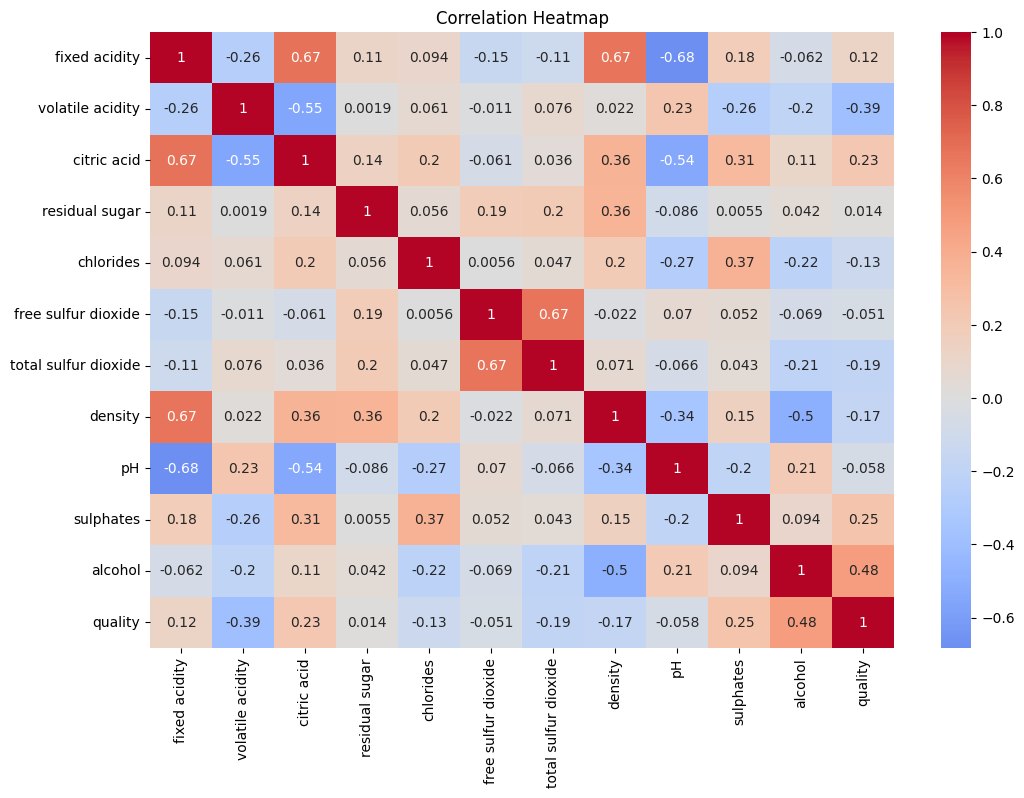

In [7]:
# 1.5 Check for correlations
corr_matrix = data.corr()
print(corr_matrix["quality"].sort_values(ascending=False))

plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")


# Conclusion:
# - The target variable Quality is highly correlated with Alcohol and Volatile Acidity.
# - The target variable Quality is negatively correlated with Density and Chlorides.
# - The features have different correlations with each other. We will have to transform them.

<Axes: >

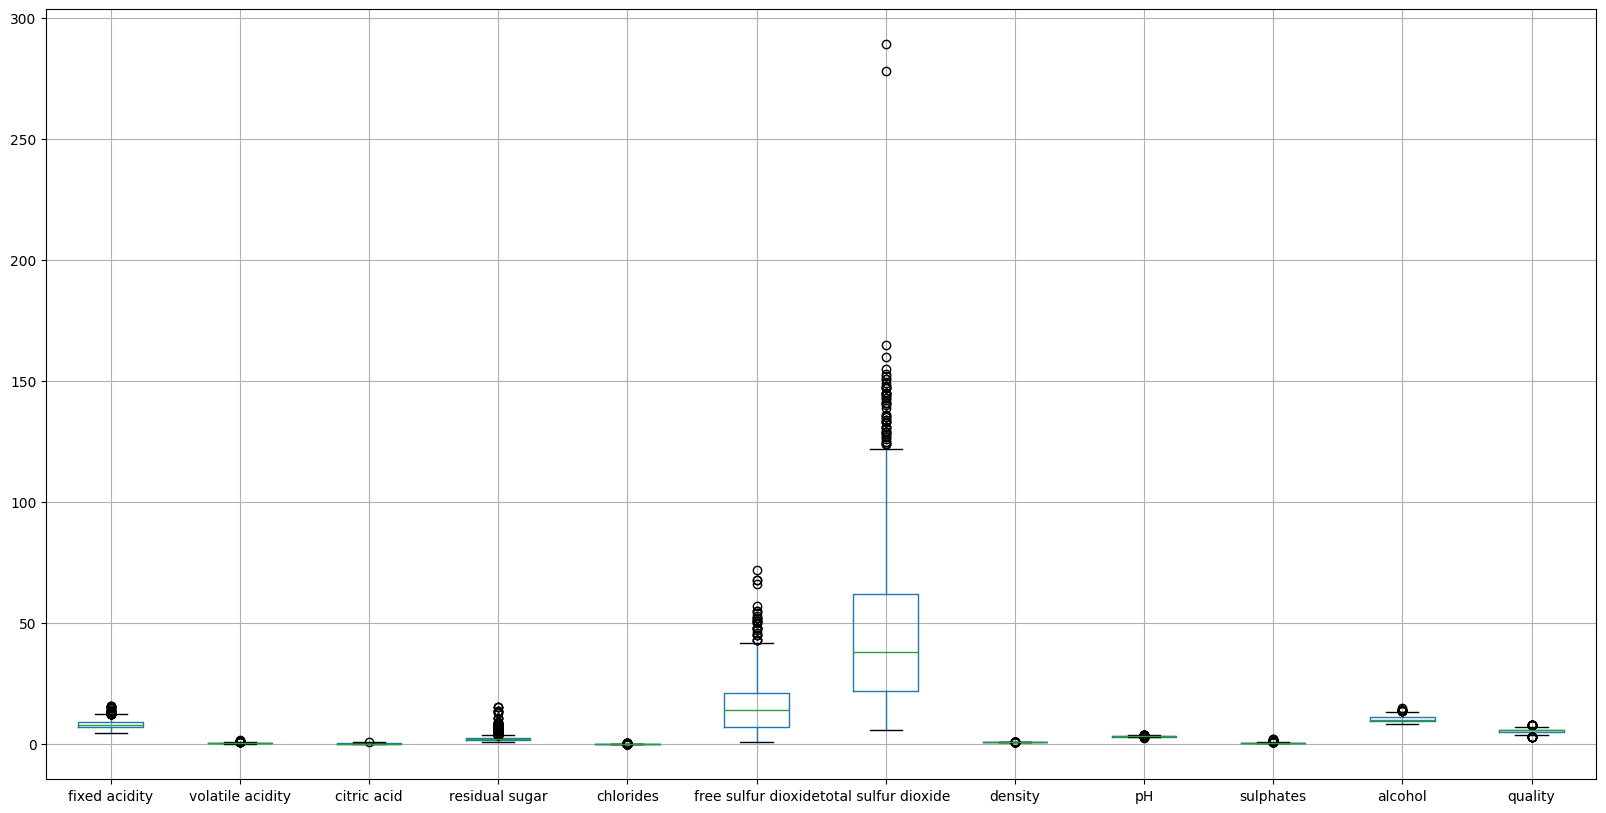

In [8]:
# 1.6 Check for outliers
data.boxplot(figsize=(20, 10))

# Conclusion:
# - Free Sulfur Dioxide, Total Sulfur Dioxide, and Chlorides have outliers. We will have to remove them.

In [9]:
# 1.7 Check for class balance
data["quality"].value_counts()

# Conclusion:
# - The target variable Quality is not balanced. We will have to balance it.
# - We will have to use stratified sampling.
# - We will have to use cross-validation.

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

#### 2. Data Preprocessing, Model training and Model Selection


In [10]:
# 2.1 Classification problem
# If wine is rated between 3 and 6, it is not excellent. If wine is rated between 7 and 8, it is excellent.
data["excellent"] = data["quality"].apply(lambda x: 1 if x in [7, 8] else 0)
data.drop("quality", axis=1, inplace=True)

In [11]:
# 2.2 Scale features
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop("excellent", axis=1)
y = data["excellent"]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [12]:
# Evaluate different models with cross-validation
# 1. Logistic Regression
# 2. Decision Trees
# 3. Random Forest
# 4. Support Vector Machine
# 5. Gradient Boosting

import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Assuming X_normalized and y are already defined and properly preprocessed

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List of models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=10000)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    # Only if probability estimates are necessary
    ("Support Vector Machine", SVC(probability=True)),
    ("Gradient Boosting", GradientBoostingClassifier()),
]

# Metrics to evaluate
metrics = ["accuracy", "f1", "precision", "recall", "roc_auc"]

# Evaluate each model
results = pd.DataFrame()
for name, model in models:
    for metric in metrics:
        try:
            cv_score = cross_val_score(
                model, X_normalized, y, cv=skf, scoring=metric, n_jobs=-1
            ).mean()
            results.at[name, metric] = cv_score
        except ValueError as e:
            results.at[name, metric] = None
            print(f"Error evaluating {name} with metric {metric}: {e}")

# Display results
print(results)

# Determine the best model based on F1 score
best_model = results["f1"].idxmax()
print(
    f"\nThe best model based on F1 score is {best_model} with an F1 score of {results.at[best_model, 'f1']:.4f}"
)

                        accuracy        f1  precision    recall   roc_auc
Logistic Regression     0.881810  0.428413   0.614238  0.331712  0.876597
Decision Tree           0.871181  0.550999   0.541010  0.590381  0.741283
Random Forest           0.916818  0.598307   0.747550  0.502643  0.915257
Support Vector Machine  0.887431  0.415415   0.707018  0.294926  0.853512
Gradient Boosting       0.903072  0.596845   0.689596  0.525793  0.902141

The best model based on F1 score is Random Forest with an F1 score of 0.5983


### Conclusion

- We select Random Forest as model with a very high accuracy of 91.6% and the best F1 score of 59.8%.
